In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Regresion Lineaire

In [2]:
#modèle linéaire
def model(X,theta):
    return X.dot(theta)

In [3]:
#fontion coût
def cost_function (X,y,theta):
    m = len(y)
    return 1/(2*m)*np.sum(model(X,theta)-y)**2

In [4]:
#fonciton calcul du gradient
def grad(X,y,theta):
    m = len(y)
    return 1/m* X.T.dot(model(X, theta)-y)

In [5]:
def gradient_descent(X,y,theta,learning_rate,n_iterations):
    #création d'un tableau de stockage
    cost_history = np.zeros(n_iterations)
    
    for i in range(0,n_iterations):
        theta = theta - learning_rate* grad(X,y, theta)
        cost_history[i] = cost_function(X,y,theta)
    return theta, cost_history

In [6]:
df =pd.read_csv('Data_Regression/reg_simple.csv')

In [7]:
#machine learnig test
n_iterations = 20
learning_rate = 0.001 


In [8]:
#affectation de la target et de la feature
X = np.array((df.heure_rev))
y = np.array((df.note))
#redimensionnement
X = X.reshape(-1,1)
y = y.reshape(-1,1)

#création de la matrice X
X =  np.hstack((X,np.ones(X.shape)))

In [9]:
#creéation du vecteur théta
theta = np.random.randn(2,1)

In [10]:
theta_final, cost_history = gradient_descent(X,y, theta,learning_rate,n_iterations)

In [11]:
predictions = model(X,theta_final)

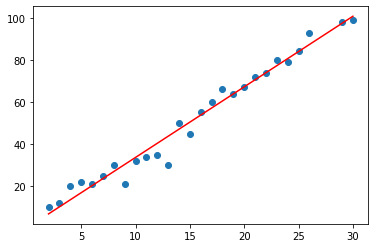

In [12]:
plt.scatter(X[:,0],y)
plt.plot(X[:,0],predictions, c='r')
plt.show()


## Regression multiple

In [13]:
df = pd.read_csv("Data_Regression/boston_house_prices.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [14]:
y = np.array(df["AGE"])
y = y.reshape(y.shape[0],1)
X = df.drop(columns=["AGE"])
print(X.shape,y.shape)

(506, 13) (506, 1)


In [15]:
X =  np.hstack((X,np.ones((X.shape[0],1))))
print(X.shape)

(506, 14)


In [16]:
theta = np.random.randn(14,1)
print(theta)

[[-1.03727294]
 [-0.3052001 ]
 [ 0.92434044]
 [ 0.81058092]
 [-1.59584523]
 [ 3.43433263]
 [ 1.35307522]
 [ 0.18644483]
 [ 0.06727623]
 [ 1.82350517]
 [ 2.00117978]
 [-0.41614321]
 [ 1.41208015]
 [-1.26378412]]


In [17]:
n_iterations = 20
learning_rate = 0.001
print(X.shape, y.shape, theta.shape)

(506, 14) (506, 1) (14, 1)


In [18]:
theta_final, cost_history = gradient_descent(X,y,theta,learning_rate,n_iterations)
print(theta_final)
predictions = model(X,theta_final)

[[6.06628660e+47]
 [1.36285192e+48]
 [1.63725382e+48]
 [9.26900602e+45]
 [7.71539994e+46]
 [8.47304391e+47]
 [4.87010473e+47]
 [1.49909641e+48]
 [5.98252915e+49]
 [2.53101564e+48]
 [4.83807747e+49]
 [1.80597619e+48]
 [2.96093145e+48]
 [1.35677522e+47]]


In [19]:
print(X.shape, y.shape)
print(predictions.shape)

(506, 14) (506, 1)
(506, 1)


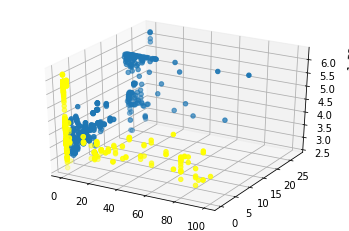

In [20]:
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

fig = plt.figure()
ax=fig.add_subplot(111,projection='3d')
#for i in range(X.shape[1]):
ax.scatter(X[:,0],X[:,2],predictions)
ax.scatter(X[:,1],X[:,3],predictions,color = 'yellow')
plt.show()

## Regresion Polynomiale

In [79]:
df = pd.read_csv("Data_Regression/Position_Salaries.csv")
df.head()

,Position,Level,Salary
0,Project Analyste,1,45000
1,Ingenieur,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [93]:
x = df["Level"]
y = df["Salary"]
x = df.iloc[:, 1:2].values.reshape(-1,1)
y = df.iloc[:, 2].values.reshape(-1,1)

X = np.hstack((x,np.ones(x.shape)))
X = np.hstack((x**2, X))
X = np.hstack((x**3, X))
X = np.hstack((x**4, X))
X = np.hstack((x**5, X))
print(X.shape,y.shape)

(10, 6) (10, 1)


In [94]:
theta = np.random.randn(6,1)
n_iterations = 10000000
learning_rate = 0.0001

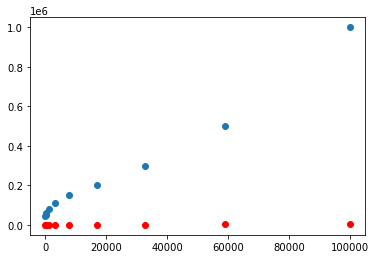

In [97]:
plt.scatter(X[:,0],y)
plt.scatter(X[:,0], model(X,theta), c='r')

In [95]:
theta_final, cost_history = gradient_descent(X,y,theta,learning_rate,n_iterations)
print(theta_final)
predictions = model(X,theta_final)

<ipython-input-3-ccdc0662228a>:4: RuntimeWarning: overflow encountered in double_scalars
  return 1/(2*m)*np.sum(model(X,theta)-y)**2
<ipython-input-5-03b7b1bdb9cf>:6: RuntimeWarning: invalid value encountered in subtract
  theta = theta - learning_rate* grad(X,y, theta)


[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]


In [87]:
print(X.shape, y.shape)
print(predictions.shape)

(10, 6) (10, 1)
(10, 1)


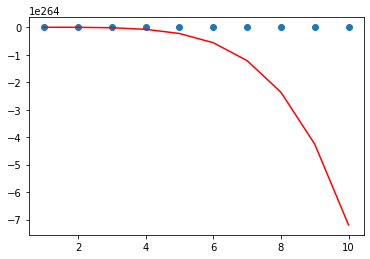

In [90]:
plt.scatter(x[:,0],y)
plt.plot(x[:,0],predictions, c='r')